# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 27th, 2022 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

In [27]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math 
from random import choice, gauss
import seaborn as sns

Functions definitons.

In [28]:
def poisson(l: float, k: int):
  return np.exp(-l)*(l**k/math.factorial(k))

def friendship_paradox(G: nx.Graph):
    fba = []
    for _ in range(1000):
        node = np.random.choice(G.nodes())
        neighbors = iter(G[node])

        deg = 0
        for i, neighbor in enumerate(neighbors, 1):
            deg += G.degree(neighbor)
        deg /= i

        fba.append(int(deg > G.degree(node)))
    return sum(fba)/len(fba)

def generate_degree_seq(gamma, x_min, nodes):
    transform = lambda r: int(x_min*(1-r)**(-1/(gamma-1)))

    deg_seq = []
    for _ in range(nodes):
        deg_seq.append(transform(np.random.uniform()))

    if sum(deg_seq)%2 == 1:
        deg_seq[0] += 1

    return deg_seq

def get_random_graph(n, p):
    g = np.zeros((n, n))
    for pair in combinations(range(n), 2):
        if np.random.uniform() < p:
            g[pair[0]][pair[1]] = 1
            g[pair[1]][pair[0]] = 1
    return nx.from_numpy_matrix(g)

# Part 1: Binning degree distributions


A. Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [29]:
data = []
for i in range(5000): 
    d = gauss(2, 0.125)
    data.append(d)
hist, edges = np.histogram(data, 10)


 * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
 > The function returns groups and edges of those groups, thus the array with edges is one longer as it must contains the end edge.
 * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
 > To deal with the different lengths of arrays the last edge is not taken into account.

Text(0, 0.5, 'Count')

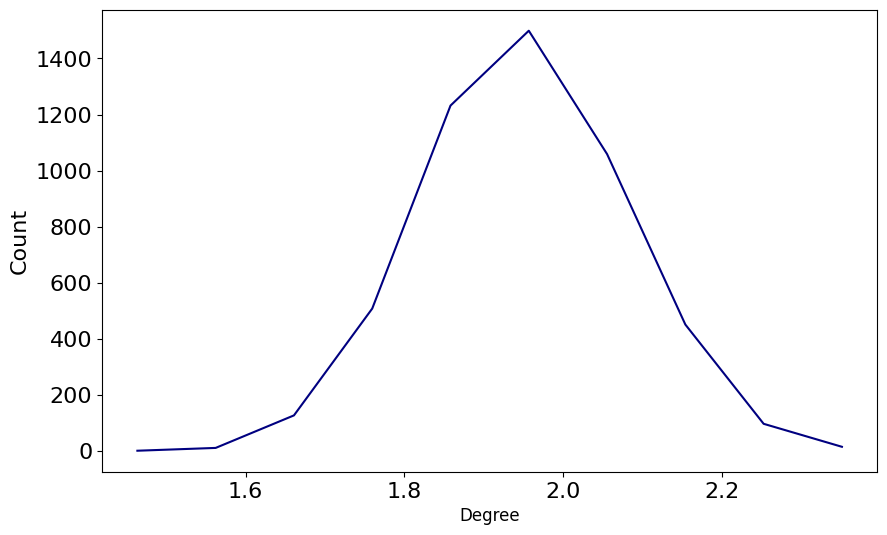

In [30]:
plt.figure(figsize = (10,6))
plt.plot(edges[:-1], hist, color = 'navy')
plt.xlabel("Degree", fontsize = 12)
plt.ylabel("Count")

B. Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

25
1


Text(0, 0.5, 'Count')

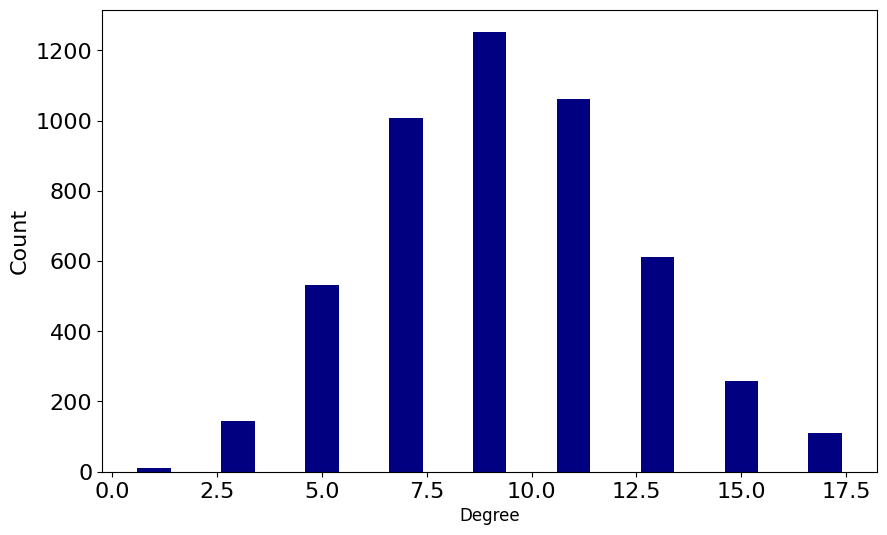

In [31]:
data_2 = np.random.poisson(10, 5000)
max_data_2 = np.max(data_2)
min_data_2 = np.min(data_2)
print(max_data_2)
print(min_data_2)
bins = np.linspace(1,19,10)
hist_2, edges_2 = np.histogram(data_2, bins = bins)

plt.figure(figsize = (10,6))
plt.bar(edges_2[:-1], hist_2, color = 'navy')
plt.xlabel("Degree", fontsize = 12)
plt.ylabel("Count")

C. Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Text(0, 0.5, 'Count')

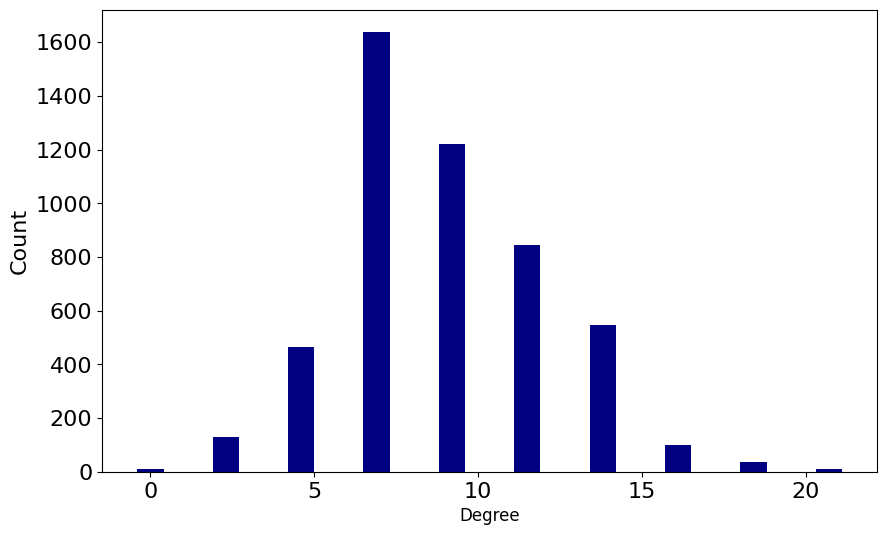

In [32]:
k = 10
N = 5000
p = k/(N-1)

ER_G = nx.erdos_renyi_graph(N, p)
degree_sequence = sorted((d for n, d in ER_G.degree()), reverse=True)
bins = np.linspace(np.min(degree_sequence),np.max(degree_sequence), int(np.max(degree_sequence)/2))
hist_ER, edges_ER = np.histogram(degree_sequence, bins = bins)
plt.figure(figsize = (10,6))
plt.bar(edges_ER[:-1], hist_ER, color = 'navy')
plt.xlabel("Degree", fontsize = 12)
plt.ylabel("Count")

# Part 2: Random networks and plotting in `networkx`
 
A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

a) Erdős-Rényi Networks: Consider an Erdős-Rényi network with $N = 3000$ nodes, connected to each other with probability $p = 10^{–3}.$

In [33]:
N = 3000
p = 0.001
ER = nx.erdos_renyi_graph(N, p)

b) What is the expected number of links, $\langle L \rangle$?

In [34]:
L = p*N*(N-1)/2
print(f"Expected number of links: {L:.2f}")

Expected number of links: 4498.50


c) In which regime is the network?

In [35]:
k = 2*L/N
print(f"k = {k:.2f} --> supercritical regime")

k = 3.00 --> supercritical regime


d) Calculate the probability pc so that the network is at the critical point.

In [36]:
p_critical = 1/N
print(f"Critical point: {p_critical:.5f}")

Critical point: 0.00033


e) Given the linking probability $p = 10^{-3}$, calculate the number of nodes Ncr so that the network has only one component.

In [37]:
for n in range(1, 50001):
  if p*(n-1) > np.log(n):
    break

print(f"The number of nodes Ncr: {int(n)}")

The number of nodes Ncr: 9120


f) For the network in (d). calculate the average degree $\langle k \rangle$ and the average distance betweem two randomly chosen nodes $\langle d \rangle$.

In [38]:
avg_k = p_critical*(N-1)
print(f"Average degree: {avg_k:.2f}")

d = np.log(N)/np.log(k)
print(f"Average distance: {d:.2f}")

Average degree: 1.00
Average distance: 7.29


Calculate the degree distribution of $p_k$ of this network.

C:\Users\Basia\AppData\Local\Temp\ipykernel_21336\1981883637.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  degrees = nx.adjacency_matrix(rand_graph).sum(axis=1)


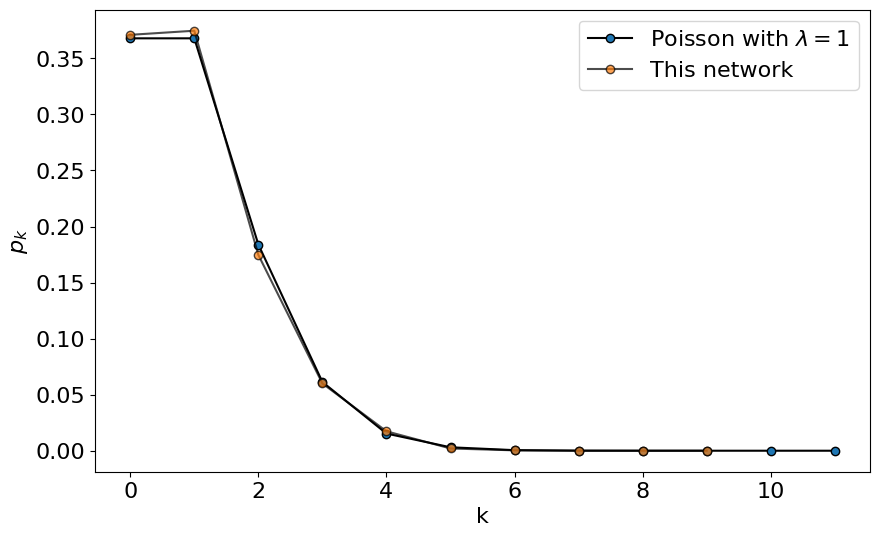

In [39]:
plt.rcParams.update({"font.size": 16})

rand_graph = get_random_graph(N, p_critical)
degrees = nx.adjacency_matrix(rand_graph).sum(axis=1)
hist, bins = np.histogram(degrees, bins=range(11))
hist = hist / np.sum(hist)

x = np.arange(0, 12, dtype=int)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x, [poisson(1, k) for k in x], color="k", marker="o", markerfacecolor="C0", label="Poisson with $\lambda=1$")
ax.plot(bins[:-1], hist, marker="o", color="k", markerfacecolor="C1", label="This network", alpha=0.7)
ax.set(
    xlabel="k",
    ylabel="$p_k$",
)
ax.legend()
plt.show()

B. Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

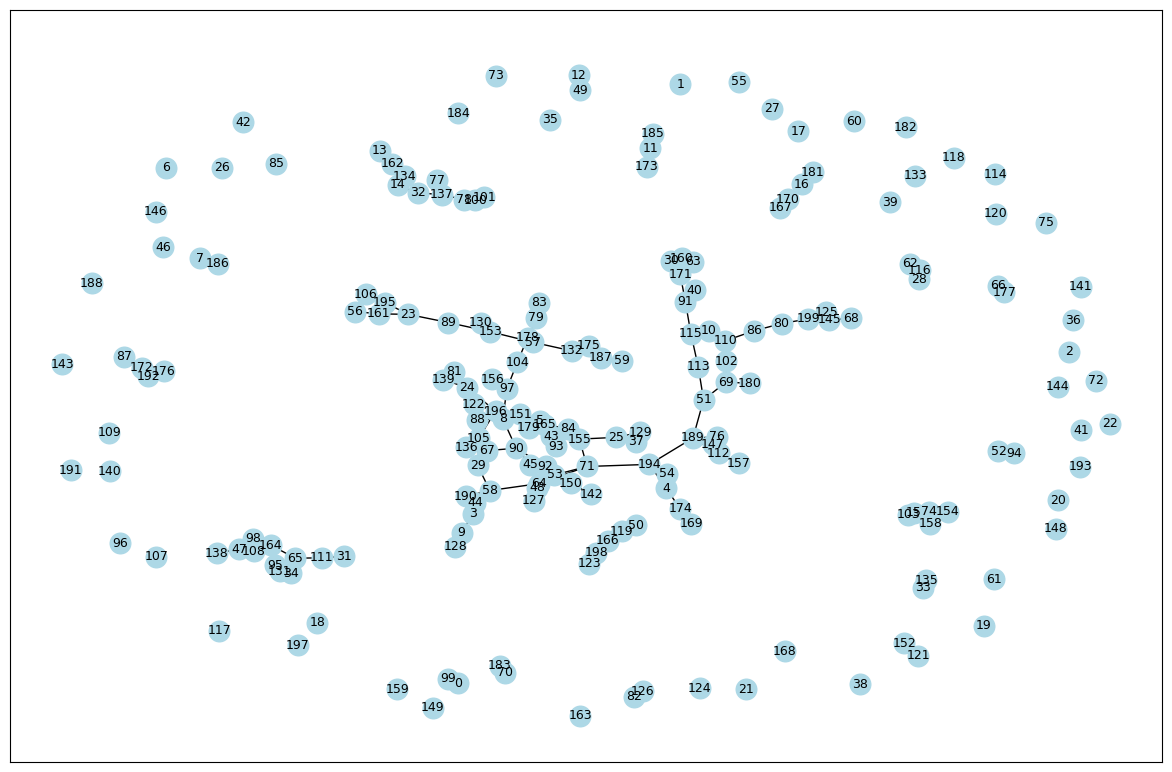

In [40]:
N = 200
k = 1.5
p = k/(N-1)
random_network = nx.erdos_renyi_graph(N, p)

plt.figure(figsize=(12,8))
nx.draw_networkx(random_network, node_size = 220, font_size = 9, node_color = 'lightblue')
plt.tight_layout()

Random node:  180
Nodes with paths =2 from random node:  [51, 102]


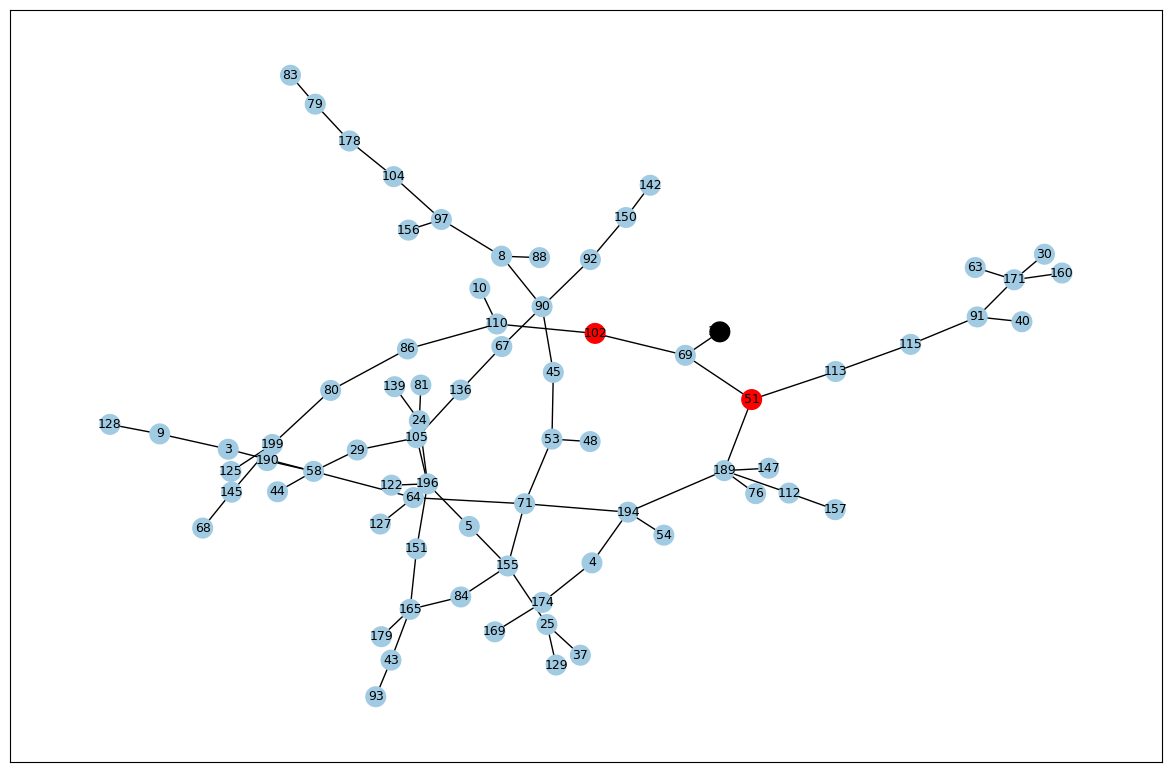

In [41]:
S = [random_network.subgraph(c).copy() for c in nx.connected_components(random_network)]
GCC = max(S, key=len)
# select random node
random_node = choice(list(GCC.nodes()))
print("Random node: ", random_node)

paths = nx.single_source_shortest_path_length(GCC, random_node)
paths_2 = []
# saving nodes that are 2 steps away from random node
for i in paths:
    if paths[i] == 2:
        paths_2.append(i)
print("Nodes with paths =2 from random node: ", paths_2)

color_map = []
for node in GCC:
    if node == random_node:
        color_map.append('#000000')
    elif node in paths_2:
        color_map.append('#ff0000')     
    else:
        color_map.append("#A0CBE2") 
plt.figure(figsize=(12,8))
nx.draw_networkx(GCC, node_size = 200, font_size = 9, node_color=color_map)
plt.tight_layout()

# Part 3: Watts-Strogatz Networks

A. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

In [42]:
N = 500
k = 4
p1 = 0
p2 = 0.1
p3 = 1
WS_1 = nx.watts_strogatz_graph(N, k, p1)
WS_2 = nx.watts_strogatz_graph(N, k, p2)
WS_3 = nx.watts_strogatz_graph(N, k, p3)

d_1 = nx.average_shortest_path_length(WS_1)
d_2 = nx.average_shortest_path_length(WS_2)
d_3 = nx.average_shortest_path_length(WS_3)

print("Average shortest path for p = 0: ", np.round(d_1, 2))
print("Average shortest path for p = 0.1: ", np.round(d_2, 2))
print("Average shortest path for p = 1: ", np.round(d_3, 2))

Average shortest path for p = 0:  62.88
Average shortest path for p = 0.1:  7.78
Average shortest path for p = 1:  4.78


**What happens to the network when $p = 1$.**

When $p=1$ the model displays the small-world property but has has low clustering. The average distace decreases when $p$ decreases. 


B. Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

Text(0, 0.5, 'Average of <d>')

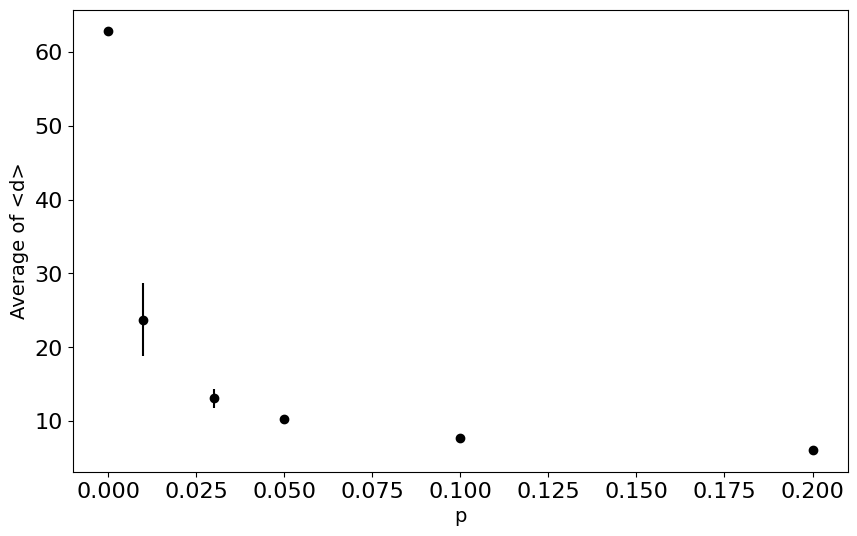

In [43]:
p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
average_path = np.zeros((len(p_list), 50))
for idx, p in enumerate(p_list):
    for i in range(50):
        average_path[idx,i] = nx.average_shortest_path_length(nx.watts_strogatz_graph(N, k, p))

std = average_path.std(axis = 1)
mean = average_path.mean(axis = 1)
plt.figure(figsize = (10,6))
plt.scatter(p_list, mean, color = "black")
plt.errorbar(p_list, mean, yerr = std, fmt  = "none", color = "black")
plt.xlabel("p", fontsize = 14)
plt.ylabel("Average of <d>", fontsize = 14)

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

A. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

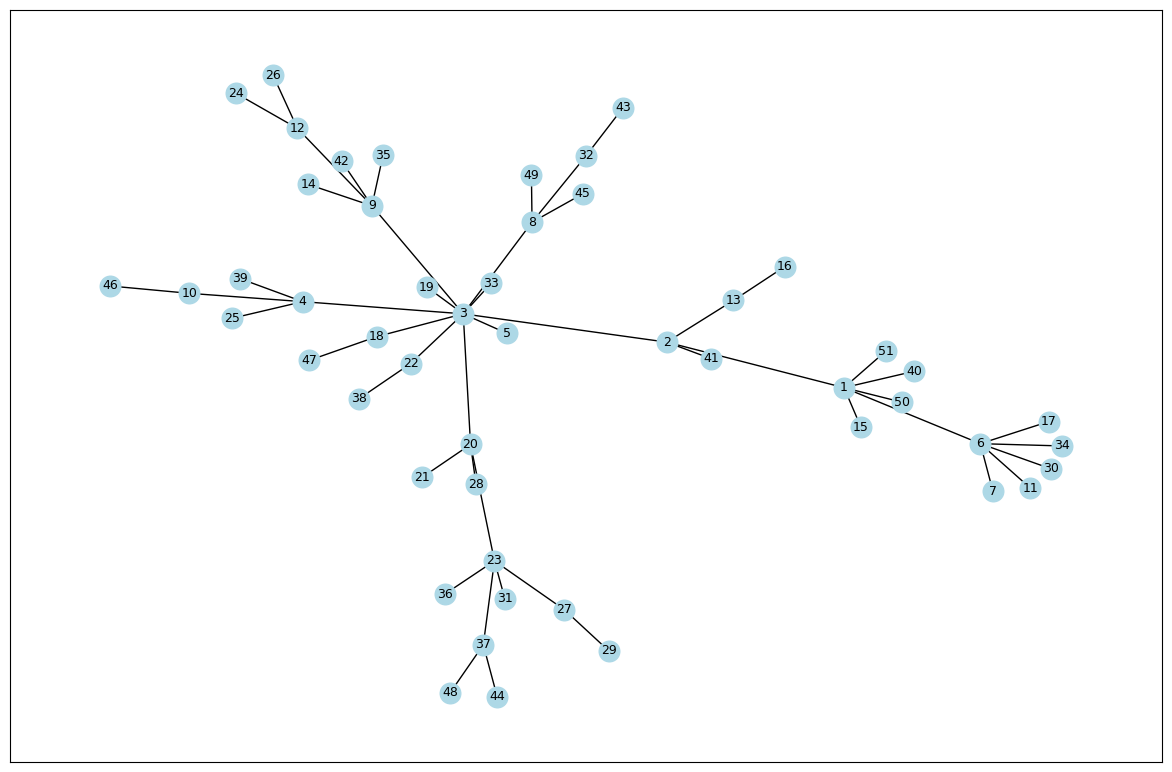

In [44]:
BA = nx.Graph()
BA.add_nodes_from([1, 2])
BA.add_edges_from([(1,2)])

for i in range(3,52):
    edges_flat_list = list()
    edges_list = list(BA.edges)
    for sub_list in edges_list:
        edges_flat_list += sub_list
    next_link = choice(edges_flat_list)
    BA.add_nodes_from([i])
    BA.add_edges_from([(next_link,i)])

plt.figure(figsize=(12,8))
nx.draw_networkx(BA, node_size = 220, font_size = 9, node_color = 'lightblue')
plt.tight_layout()


B. Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

In [45]:
# add more nodes to the network
for i in range(51,5001):
    edges_flat_list = list()
    edges_list = list(BA.edges)
    for sub_list in edges_list:
        edges_flat_list += sub_list
    next_link = choice(edges_flat_list)
    BA.add_nodes_from([i])
    BA.add_edges_from([(next_link,i)])

Text(0, 0.5, 'Count')

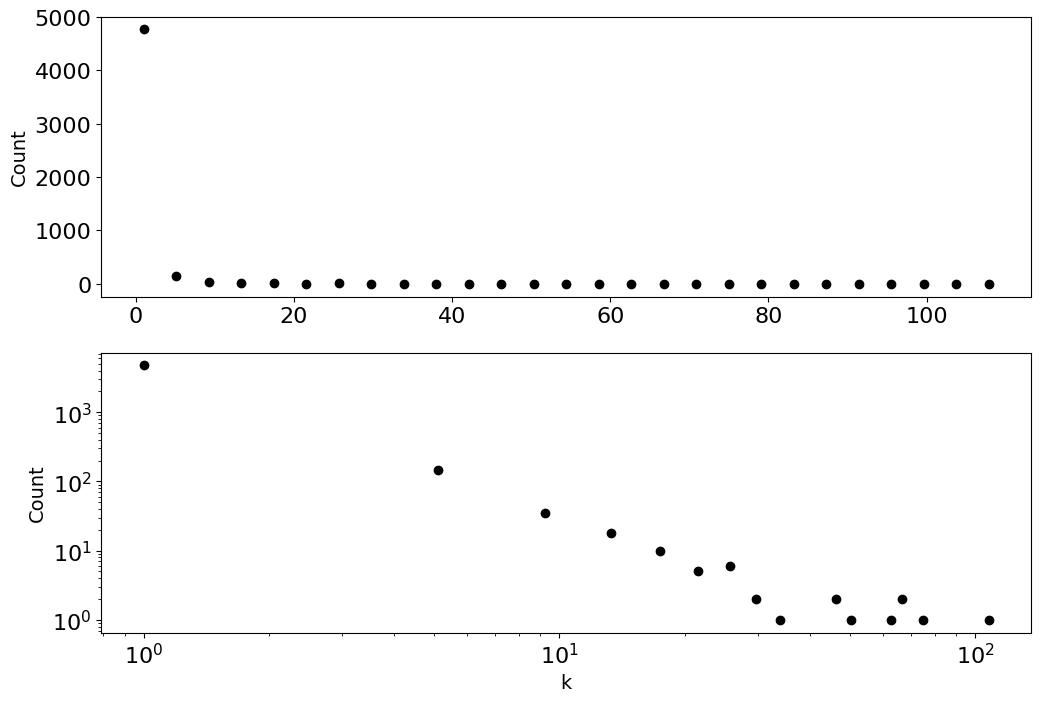

In [46]:
# plot degree distribution of the network
degree_sequence = sorted((d for n, d in BA.degree()), reverse=True)

bins = np.linspace(np.min(degree_sequence),np.max(degree_sequence), int(np.max(degree_sequence)/4))
hist, edges = np.histogram(degree_sequence, bins = bins)
fig, ax = plt.subplots(2,1, figsize = (12,8))
ax[0].scatter(edges[:-1], hist, color = "black")
ax[0].set_ylabel('Count', fontsize = 14)

ax[1].scatter(edges[:-1], hist, color = "black")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel("k", fontsize = 14)
ax[1].set_ylabel('Count', fontsize = 14)

# Part 5. Power-laws and the friendship paradox


Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

A. The friendship paradox in BA networks
* Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
* Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
* Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In [47]:
F_BA = BA
random_node = choice(list(F_BA.nodes()))
print("Random node: ", random_node)
print("Degree of random node: ", F_BA.degree(random_node))
neighbors = list(F_BA.neighbors(random_node))
print("Neighbors of random node: ", neighbors)
neighbors_degree = np.zeros(len(neighbors))
for idx, n in enumerate(neighbors):
    neighbors_degree[idx] = F_BA.degree(n)
avg_neighbor_degree = neighbors_degree.mean()
print("Average degree of neighbors: ", avg_neighbor_degree)

paradox = 0
for i in range(1000):
    random_node = choice(list(F_BA.nodes()))
    random_node_degree = F_BA.degree(random_node)
    neighbors = list(F_BA.neighbors(random_node))
    neighbors_degree = np.zeros(len(neighbors))
    for idx, n in enumerate(neighbors):
        neighbors_degree[idx] = F_BA.degree(n)
    avg_neighbor_degree = neighbors_degree.mean()
    if avg_neighbor_degree > random_node_degree:
        paradox += 1
print(paradox)
print("The friendship paradox is true {} times out of 1000 ({}%)".format(paradox, paradox/1000*100))


Random node:  2819
Degree of random node:  1
Neighbors of random node:  [165]
Average degree of neighbors:  8.0
859
The friendship paradox is true 859 times out of 1000 (85.9%)



B. The friendship paradox more generally
* What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1.5$? Will the fraction of times the paradox is true be higher or lower? 
 - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
 - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
    * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
    * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?
- Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in 5.A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
   - What fraction of the time is the friendship paradox is true for the **F-CM** network?
   - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
      * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
      * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1.5$? Will the fraction of times the paradox is true be higher or lower?

> In this setup preferential attachement is superlinear which means that the tendency to link to highly connected notes is enhanced. That accelerates the _rich-gets-richer_ process. Therefore fraction of times the paradox is true should be higher. The network should contain several big hubs which are a root cause of the friendship paradox.

In [49]:
flatter = nx.configuration_model(generate_degree_seq(1.5, 1.5, 5000))
print(f"Friendship paradox alpha=1.5 {friendship_paradox(flatter):.2%}")

Friendship paradox alpha=1.5 99.80%


In [50]:
FCM = nx.configuration_model(generate_degree_seq(3, 1.5, 5000))
print(f"Friendship paradox alpha=3 {friendship_paradox(FCM):.2%}")

Friendship paradox alpha=3 70.20%


Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer)

> Yes, if network is disassortative e.g. random network, which means that nodes don't have preferences of attachment, hubs cease to exist. If there are very few or no hubs, the freindsip paradox doesn't occur.

How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

> I would do a statistical test where each configuration model would be created X number of times. Then I would take the average of frienship paradox percentage ofer X runs and also calculate the standard deviation. What's more, there can be created configuration models for multiple network size (500, 1000, 1500 nodes and so on) which would allow to plot average friendship paradox percentage over number of nodes together with standard deviation.

# Part 6. Growth without Preferential Attachment

Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment. Follwo the steps below for success

* Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, *but have the incoming nodes connect to the existing nodes with* **equal probability**. Let's call this the Sune-network.
* Generate an ER network of same size and same $p$ as the Sune-network. 
* What are the differences between the ER network and the Sune-network? Explain in your own words. 
  * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

In [51]:
n = 5000
p = 0.001
sune_net = nx.Graph({
    0: (),
})
ER = get_random_graph(n, 1/n)

for i in range(1, n):
  sune_net.add_node(i)
  # Each iteration, add a new node with m (<= m0) links that connect the new node to
  # m nodes already existing in the netowrk, where m0 is the initial number of nodes
  sune_net.add_edge(i, np.random.choice(sune_net.nodes()))


deg_sune = [d for _, d in sune_net.degree()]
deg_er = [d for _, d in ER.degree()]

In [52]:
sune_connected = [len(c) for c in sorted(nx.connected_components(sune_net), key=len, reverse=True)]
er_connected = [len(c) for c in sorted(nx.connected_components(ER), key=len, reverse=True)]

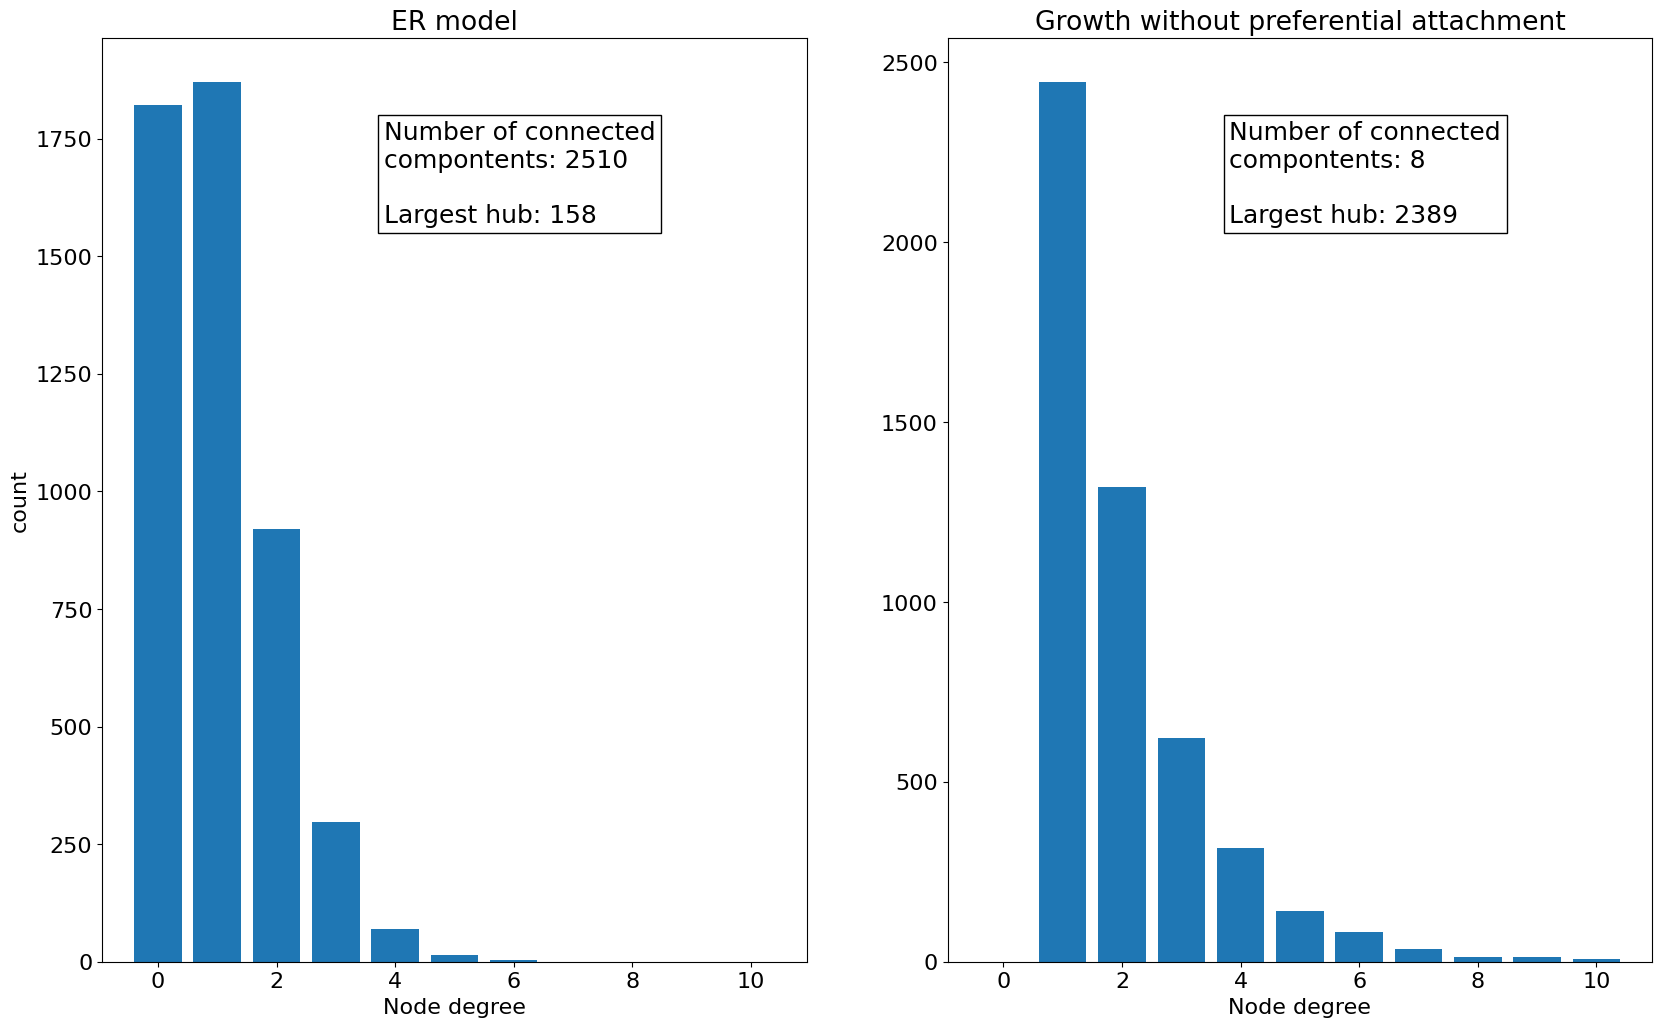

In [53]:
hist_sune, bins_sune = np.histogram(deg_sune, range(12))
hist_er, bins_er = np.histogram(deg_er, range(12))

fig, ax = plt.subplots(1, 2, figsize=(20, 12))
ax[0].bar(bins_er[:-1], hist_er, width=0.8, align="center")
ax[0].set(
    title="ER model",
    xlabel="Node degree",
    ylabel="count",
)
ax[0].text(
    0.4, 0.8,
    f"Number of connected\ncompontents: {len(er_connected)}\n\nLargest hub: {er_connected[0]}",
    fontsize=18,
    transform=ax[0].transAxes,
    bbox=dict(facecolor="white"),
)
ax[1].bar(bins_sune[:-1], hist_sune, width=0.8, align="center")
ax[1].set(
    title="Growth without preferential attachment",
    xlabel="Node degree",
)
ax[1].text(
    0.4, 0.8,
    f"Number of connected\ncompontents: {len(sune_connected)}\n\nLargest hub: {sune_connected[0]}",
    fontsize=18,
    transform=ax[1].transAxes,
    bbox=dict(facecolor="white")
)
plt.show()

What are the differences between the ER network and the Sune-network? Explain in your own words.
> ER model  
> * Degree distribution approximated with Poisson distribution
> * Many connected components
> * Relatively small largest hub
>   
> Sune-network (Growth without preferential attachment with $m_0 = 1$)
> * Degree distribution approximated with power-law distribution  
> * Only few connected components
> * Large hubs
